# 1. Data Ingestion & Storage
### Reading the data and storing it in dataframes
Read records for each section and store them into a pandas dataframe

In [68]:
import pandas as pd
import os

# base directory for data
base_dir = r"C:\Users\amina\Documents\MS\MSDS\Data Visualization"

# functon to read all the files
def read_excel_file(filename):
    file_path = os.path.join(base_dir, filename)
    if os.path.exists(file_path):
        return pd.read_excel(file_path)
    else:
        print(f"File not found: {file_path}")
        return None  

# Reading Attendance Data
attendance_bse2a = read_excel_file("Attendance Register_BSE-2A.xlsx")
attendance_bse2b = read_excel_file("Attendance Register_BSE-2B.xlsx")
attendance_bse2c = read_excel_file("SE-C.xlsx")
attendance_bcs2a = read_excel_file("Attendance Register_BCS-2A.xlsx")
attendance_bcs2b = read_excel_file("Attendance Register_BCS-2B.xlsx")
attendance_bcs2c = read_excel_file("Attendance Register_BCS-2C.xlsx")
attendance_bcs2d = read_excel_file("Attendance Register_BCS-2D.xlsx")
attendance_bcs2e = read_excel_file("Attendance Register_BCS-2E.xlsx")
attendance_bcs2f = read_excel_file("Attendance Register_BCS-2F.xlsx")
attendance_bcs2g = read_excel_file("Attendance Register_BCS-2G.xlsx")
attendance_bcs2h = read_excel_file("Attendance Register_BCS-2H.xlsx")
attendance_bcs2j = read_excel_file("Attendance Register_BCS-2J.xlsx")
attendance_bcs2k = read_excel_file("Attendance Register_BCS-2K.xlsx")
attendance_bcs2z = read_excel_file("Attendance Register_BCS-2Z.xlsx")
attendance_bcy2c = read_excel_file("Attendance Register_BCY-2C.xlsx")
attendance_bcy2d = read_excel_file("Attendance Register_BCY-2D.xlsx")

# Reading Evaluation Data
marks_bse2a = read_excel_file("Evaluation Report_BSE-2A.xlsx")
marks_bse2b = read_excel_file("Evaluation Report_BSE-2B.xlsx")
marks_bse2c = read_excel_file("Evaluation Report_BSE-2C.xlsx")
marks_bcs2a = read_excel_file("Evaluation Report_BCS-2A.xlsx")
marks_bcs2b = read_excel_file("Evaluation Report_BCS-2B.xlsx")
marks_bcs2c = read_excel_file("Evaluation Report_BCS-2C.xlsx")
marks_bcs2d = read_excel_file("Evaluation Report_BCS-2D.xlsx")
marks_bcs2e = read_excel_file("Evaluation Report_BCS-2E.xlsx")
marks_bcs2f = read_excel_file("Evaluation Report_BCS-2F.xlsx")
marks_bcs2g = read_excel_file("Evaluation Report_BCS-2G.xlsx")
marks_bcs2h = read_excel_file("Evaluation Report_BCS-2H.xlsx")
marks_bcs2j = read_excel_file("Evaluation Report_BCS-2J.xlsx")
marks_bcs2k = read_excel_file("Evaluation Report_BCS-2K.xlsx")
marks_bcs2z = read_excel_file("Evaluation Report_BCS-2Z.xlsx")
marks_bcy2c = read_excel_file("Evaluation Report_BCY-2C.xlsx")
marks_bcy2d = read_excel_file("Evaluation Report_BCY-2D.xlsx")


### Cleaning the data
Here's how we have cleaned attendance data:
- Skipped first 3 header rows
- chose only relevant coliumns: Roll Number and Attendance Data
- Roll number is chosen as index column
- To uniquely identify each sections roll numbers, roll number is converted into string and appended by a suffix which is basically section's name

In [69]:
# Function to clean attendance data
def clean_attendance(df, col_index, attendance_col, suffix):
    df = df.iloc[3:, [col_index, attendance_col]]
    df.columns = ["Roll_Num", "Attendance"]
    df["Roll_Num"] = df["Roll_Num"].astype(str) + "_" + suffix
    return df

# Cleaning Attendance Data
attendance_bse2a = clean_attendance(attendance_bse2a, 2, 39, "bse2a")
attendance_bse2b = clean_attendance(attendance_bse2b, 2, 39, "bse2b")
attendance_bse2c = clean_attendance(attendance_bse2c, 2, 39, "bse2c")
attendance_bcy2c = clean_attendance(attendance_bcy2c, 2, 39, "bcy2c")
attendance_bcy2d = clean_attendance(attendance_bcy2d, 2, 39, "bcy2d")
attendance_bcs2a = clean_attendance(attendance_bcs2a, 2, 41, "bcs2a")
attendance_bcs2b = clean_attendance(attendance_bcs2b, 2, 39, "bcs2b")
attendance_bcs2c = clean_attendance(attendance_bcs2c, 2, 39, "bcs2c")
attendance_bcs2d = clean_attendance(attendance_bcs2d, 2, 38, "bcs2d")
attendance_bcs2e = clean_attendance(attendance_bcs2e, 2, 38, "bcs2e")
attendance_bcs2f = clean_attendance(attendance_bcs2f, 2, 39, "bcs2f")
attendance_bcs2g = clean_attendance(attendance_bcs2g, 2, 38, "bcs2g")
attendance_bcs2h = clean_attendance(attendance_bcs2h, 2, 39, "bcs2h")
attendance_bcs2j = clean_attendance(attendance_bcs2j, 2, 39, "bcs2j")
attendance_bcs2k = clean_attendance(attendance_bcs2k, 2, 39, "bcs2k")
attendance_bcs2z = clean_attendance(attendance_bcs2z, 2, 34, "bcs2z")

#### example attendance data after cleaning:

In [70]:
attendance_bcs2z.head()

,Roll_Num,Attendance
3,1_bcs2z,91
4,2_bcs2z,81
5,3_bcs2z,88
6,4_bcs2z,91
7,5_bcs2z,91


In [71]:
# Function to clean evaluation data
def clean_marks(df, col_index, assignment_col, quiz_col, s1_col, s2_col, final_col, total_col, grade_col, suffix):
    # Select only the relevant rows and columns
    df = df.iloc[8:, [col_index, assignment_col, quiz_col, s1_col, s2_col, final_col, total_col, grade_col]]
    # Rename the columns for consistency
    df.columns = ["Roll_Num", "Assignment", "Quiz", "S1", "S2", "Final", "Total", "Grade"]
    # Append the suffix to the Roll Number for identification
    df["Roll_Num"] = df["Roll_Num"].astype(str) + "_" + suffix
    return df

# Cleaning Evaluation Data for each dataset
marks_bse2a = clean_marks(marks_bse2a, 2, 8, 16, 18, 20, 24, 25, 26, "bse2a")
marks_bse2b = clean_marks(marks_bse2b, 2, 8, 16, 18, 20, 24, 25, 26, "bse2b")
marks_bse2c = clean_marks(marks_bse2c, 2, 8, 16, 18, 20, 24, 25, 26, "bse2c")
marks_bcy2c = clean_marks(marks_bcy2c, 2, 7, 13, 15, 17, 21, 22, 23, "bcy2c")
marks_bcy2d = clean_marks(marks_bcy2d, 2, 7, 13, 15, 17, 21, 22, 23, "bcy2d")
marks_bcs2a = clean_marks(marks_bcs2a, 2, 8, 15, 17, 19, 21, 22, 23, "bcs2a")
marks_bcs2b = clean_marks(marks_bcs2b, 2, 8, 15, 17, 19, 22, 23, 24, "bcs2b")
marks_bcs2c = clean_marks(marks_bcs2c, 2, 8, 15, 17, 19, 22, 23, 24, "bcs2c")
marks_bcs2d = clean_marks(marks_bcs2d, 2, 8, 15, 17, 19, 22, 23, 24, "bcs2d")
marks_bcs2e = clean_marks(marks_bcs2e, 2, 8, 15, 17, 19, 22, 23, 24, "bcs2e")
marks_bcs2f = clean_marks(marks_bcs2f, 2, 8, 15, 17, 19, 21, 22, 23, "bcs2f")
marks_bcs2g = clean_marks(marks_bcs2g, 2, 8, 15, 17, 19, 22, 23, 24, "bcs2g")
marks_bcs2h = clean_marks(marks_bcs2h, 2, 8, 15, 17, 19, 21, 22, 23, "bcs2h")
marks_bcs2j = clean_marks(marks_bcs2j, 2, 8, 15, 17, 19, 21, 22, 23, "bcs2j")
marks_bcs2k = clean_marks(marks_bcs2k, 2, 8, 15, 17, 19, 21, 22, 23, "bcs2k")
marks_bcs2z = clean_marks(marks_bcs2z, 2, 7, 12, 18, 20, 24, 25, 26, "bcs2z")


#### example data for Marks dataframe:

In [72]:
marks_bcs2z.head()

,Roll_Num,Assignment,Quiz,S1,S2,Final,Total,Grade
8,RollNo_bcs2z,NaN,NaN,0,0,0,NaN,NaN
9,1_bcs2z,3.55,8.16,1.6,5.09,23.71,48.98,C-
10,2_bcs2z,NaN,8.22,3,0.9,15.28,30.41,F
11,3_bcs2z,3.52,8.66,3.2,3.9,21.14,51.27,C-
12,4_bcs2z,4.16,6.66,1,6.6,24,49.94,C-


# Data Cleaning
### Combine sessional marks for different weight categories

- Sections with sessional out of 25 are combined.
- Sections with sessional out of 30 are combined.
- Both sessional groups are standardized to percentages out of 100.
- Converts raw scores (out of 40) to percentages.

In [73]:
# Combining dataframes and standardizing sessional marks
sessional_25 = pd.concat([marks_bcs2z, marks_bse2a, marks_bse2b, marks_bse2c])
sessional_25 = sessional_25.dropna()
sessional_25[["S1", "S2"]] = sessional_25[["S1", "S2"]].apply(pd.to_numeric)
sessional_25["Sessional"] = (sessional_25["S1"] + sessional_25["S2"]) / 25 * 100

sessional_30 = pd.concat([
    marks_bcs2a, marks_bcs2b, marks_bcs2c, marks_bcs2d, marks_bcs2e, marks_bcs2f,
    marks_bcs2g, marks_bcs2h, marks_bcs2j, marks_bcs2k, marks_bcy2c, marks_bcy2d
])
sessional_30 = sessional_30.dropna()
sessional_30[["S1", "S2"]] = sessional_30[["S1", "S2"]].apply(pd.to_numeric)
sessional_30["Sessional"] = (sessional_30["S1"] + sessional_30["S2"]) / 30 * 100

# Standardizing Final Marks
marks = pd.concat([sessional_25, sessional_30])
marks["Final"] = pd.to_numeric(marks["Final"])
marks["Final"] = marks["Final"] / 40 * 100

### Standardizes assignments and quizzes

#### All sections have 15 marks for assignments, except:

- bcs2z, bse2a, bse2b, bse2c, bcy2c, bcy2d have 10 marks for assignments.

- Standardize assignment marks to a common scale 

In [74]:
# Combine dataframes for sections with 10 marks for assignments
assignment_10 = pd.concat([marks_bcs2z, marks_bse2a, marks_bse2b, marks_bse2c, marks_bcy2c, marks_bcy2d])
assignment_10 = assignment_10.dropna()
assignment_10[["Assignment"]] = assignment_10[["Assignment"]].apply(pd.to_numeric)
assignment_10["Assignment_Standardized"] = (assignment_10["Assignment"] / 10) * 100

# Combine dataframes for sections with 15 marks for assignments
assignment_15 = pd.concat([marks_bcs2a, marks_bcs2b, marks_bcs2c, marks_bcs2d, marks_bcs2e, marks_bcs2f, marks_bcs2g, marks_bcs2h, marks_bcs2j, marks_bcs2k])
assignment_15 = assignment_15.dropna()
assignment_15[["Assignment"]] = assignment_15[["Assignment"]].apply(pd.to_numeric)
assignment_15["Assignment_Standardized"] = (assignment_15["Assignment"] / 15) * 100

# Combine all assignment data
assignments = pd.concat([assignment_10, assignment_15])

#### All sections have 15 marks for Quizzes, except:

- bcs2z, bse2a, bse2b, bse2c, bcy2c, bcy2d have 10 marks for assignments.

- Standardize quizzes marks to a common scale 

In [75]:
# Combine dataframes for sections with 10 marks for quizzes
quiz_10 = pd.concat([marks_bcs2z, marks_bse2a, marks_bse2b, marks_bse2c, marks_bcy2c, marks_bcy2d])
quiz_10 = quiz_10.dropna()
quiz_10[["Quiz"]] = quiz_10[["Quiz"]].apply(pd.to_numeric)
quiz_10["Quiz_Standardized"] = (quiz_10["Quiz"] / 10) * 100

# Combine dataframes for sections with 15 marks for quizzes
quiz_15 = pd.concat([marks_bcs2a, marks_bcs2b, marks_bcs2c, marks_bcs2d, marks_bcs2e, marks_bcs2f, marks_bcs2g, marks_bcs2h, marks_bcs2j, marks_bcs2k])
quiz_15 = quiz_15.dropna()
quiz_15[["Quiz"]] = quiz_15[["Quiz"]].apply(pd.to_numeric)
quiz_15["Quiz_Standardized"] = (quiz_15["Quiz"] / 15) * 100

# Combine all quiz data
quizzes = pd.concat([quiz_10, quiz_15])

#### Combine All Standardized Data

In [76]:
# Combine all standardized data
final_data = pd.merge(
    marks[["Roll_Num", "Sessional", "Final", "Grade"]],
    assignments[["Roll_Num", "Assignment_Standardized"]],
    on="Roll_Num",
    how="left"
)

final_data = pd.merge(
    final_data,
    quizzes[["Roll_Num", "Quiz_Standardized"]],
    on="Roll_Num",
    how="left"
)
final_data

,Roll_Num,Sessional,Final,Grade,Assignment_Standardized,Quiz_Standardized
0,1_bcs2z,26.760000,59.275,C-,35.5,81.6
1,3_bcs2z,28.400000,52.850,C-,35.2,86.6
2,4_bcs2z,30.400000,60.000,C-,41.6,66.6
3,5_bcs2z,74.400000,70.700,B+,67.7,52.2
4,6_bcs2z,55.880000,57.850,C+,64.7,65.5
...,...,...,...,...,...,...
520,26_bcy2d,59.800000,71.750,B+,96.0,67.9
521,27_bcy2d,40.266667,51.900,D+,55.5,48.1
522,28_bcy2d,50.900000,75.550,B,89.3,58.7
523,29_bcy2d,34.266667,65.625,C+,89.7,52.5


In [77]:
# Combining dataframes of attendance
attendance = pd.concat([attendance_bcs2a, attendance_bcs2b, attendance_bcs2c, attendance_bcs2d, attendance_bcs2e, attendance_bcs2f, attendance_bcs2g, attendance_bcs2h, attendance_bcs2j, attendance_bcs2k, attendance_bcs2z, attendance_bcy2c, attendance_bcy2d, attendance_bse2a, attendance_bse2b, attendance_bse2c])
attendance = attendance.dropna()
attendance["Attendance"] = pd.to_numeric(attendance["Attendance"])

In [78]:
# Joining Clean Marks and Attendance data
final_data = pd.merge(attendance, final_data, on="Roll_Num")

In [84]:
final_data.to_csv("final_marks.csv", index=False)

In [83]:
final_data

,Roll_Num,Attendance,Sessional,Final,Grade,Assignment_Standardized,Quiz_Standardized
0,2_bcs2a,95,17.200000,45.000,F,51.333333,68.733333
1,3_bcs2a,85,15.566667,23.100,F,24.200000,55.333333
2,4_bcs2a,95,38.933333,54.575,C-,38.400000,82.466667
3,5_bcs2a,92,25.000000,35.125,F,23.866667,73.733333
4,6_bcs2a,92,46.633333,71.875,B-,57.466667,76.933333
...,...,...,...,...,...,...,...
519,27_bse2c,97,75.320000,66.650,A-,79.600000,100.000000
520,28_bse2c,100,60.000000,52.500,C+,77.600000,85.000000
521,29_bse2c,97,70.640000,72.200,A-,86.700000,93.000000
522,30_bse2c,100,46.120000,38.875,D,54.500000,85.800000


## Storing Cleaned Data in SQL Server
create connection string to the SQL Server

In [34]:
#Create a Connection to SQL Server
import pyodbc

# Define the connection string
server = "DESKTOP-8781SPD\\SQLEXPRESS"
database = "FinalData"  
conn_str = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

# Establish a connection
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

In [85]:
# SQL query to create the table
create_table_query = """
CREATE TABLE StudentsData  (
    Roll_Num NVARCHAR(50) PRIMARY KEY,
    Attendance FLOAT,
    Sessional FLOAT,
    Final FLOAT,
    Assignment_Standardized FLOAT,
    Quiz_Standardized FLOAT,
    Grade NVARCHAR(10)
);
"""

# Execute the query to create the table
cursor.execute(create_table_query)
conn.commit()
print("Table 'StudentsData' created successfully.")

Table 'StudentsData' created successfully.


#### Insert Data into the Table
We’ll iterate through the final_data DataFrame and insert each row into the StudentMarks table.

In [86]:
# Insert data into the table
for index, row in final_data.iterrows():
    insert_query = """
    INSERT INTO StudentsData (
        Roll_Num, Attendance, Sessional, Final, Assignment_Standardized, Quiz_Standardized, Grade
    ) VALUES (?, ?, ?, ?, ?, ?, ?);
    """
    cursor.execute(insert_query, 
                   row["Roll_Num"], 
                   row["Attendance"], 
                   row["Sessional"], 
                   row["Final"], 
                   row["Assignment_Standardized"], 
                   row["Quiz_Standardized"], 
                   row["Grade"])

# Commit the transaction
conn.commit()
print("Data inserted successfully.")

Data inserted successfully.


In [88]:
# Close the cursor and connection
cursor.close()
conn.close()
print("Connection closed.")

Connection closed.


# Advanced Exploratory Data Analysis (EDA) on Transformed Data

## Step 1: Data Understanding & Summary Statistics
### 1.1 Load the Data
Load Data directly from SQL Server or we can use it from saved csv or dataframe

In [ ]:
import pandas as pd
import pyodbc

# Define the connection string
server = "DESKTOP-8781SPD\\SQLEXPRESS"
database = "FinalData"
conn_str = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

# Establish a connection
conn = pyodbc.connect(conn_str)

# Load the data into a DataFrame
query = "SELECT * FROM StudentMarks;"
final_data = pd.read_sql(query, conn)

# Close the connection
conn.close()

### 1.2 Evaluate Dataset Shape

In [89]:
# Get the shape of the dataset
print("Dataset Shape:", final_data.shape)

Dataset Shape: (524, 7)


### 1.3 Check Column Types

In [94]:
# Check column types
final_data.dtypes

Roll_Num                    object
Attendance                   int64
Sessional                  float64
Final                      float64
Grade                       object
Assignment_Standardized    float64
Quiz_Standardized          float64
dtype: object

### 1.4 Check for Missing Values

In [93]:
# Check for missing values
final_data.isnull().sum()

Roll_Num                   0
Attendance                 0
Sessional                  0
Final                      0
Grade                      0
Assignment_Standardized    0
Quiz_Standardized          0
dtype: int64

### 1.5 Basic Summary Statistics

In [92]:
# Summary statistics for numeric columns
summary_stats = final_data.describe()
summary_stats

,Attendance,Sessional,Final,Assignment_Standardized,Quiz_Standardized
count,524.000000,524.000000,524.000000,524.000000,524.000000
mean,92.622137,46.456069,57.464552,59.086069,73.906107
std,5.991578,16.586572,13.907931,20.996975,15.437577
min,64.000000,1.700000,0.000000,3.066667,22.900000
25%,88.000000,34.291667,49.250000,45.566667,65.766667
50%,94.000000,46.716667,57.837500,61.033333,76.633333
75%,97.000000,58.416667,66.525000,74.350000,85.000000
max,100.000000,86.600000,95.400000,99.600000,100.000000


### 1.6 Calculate Mode
Calculate the mode (most frequent value) for each column.

In [97]:
# Calculate mode for each column
mode_values = final_data.mode()

# Select the first mode if there are multiple modes
mode_values = mode_values.iloc[0]

print("Mode Values:")
print(mode_values)

Mode Values:
Roll_Num                    10_bcs2a
Attendance                      97.0
Sessional                       44.0
Final                           45.8
Grade                              F
Assignment_Standardized    28.733333
Quiz_Standardized               85.0
Name: 0, dtype: object


### 1.7 Visualize Summary Statistics

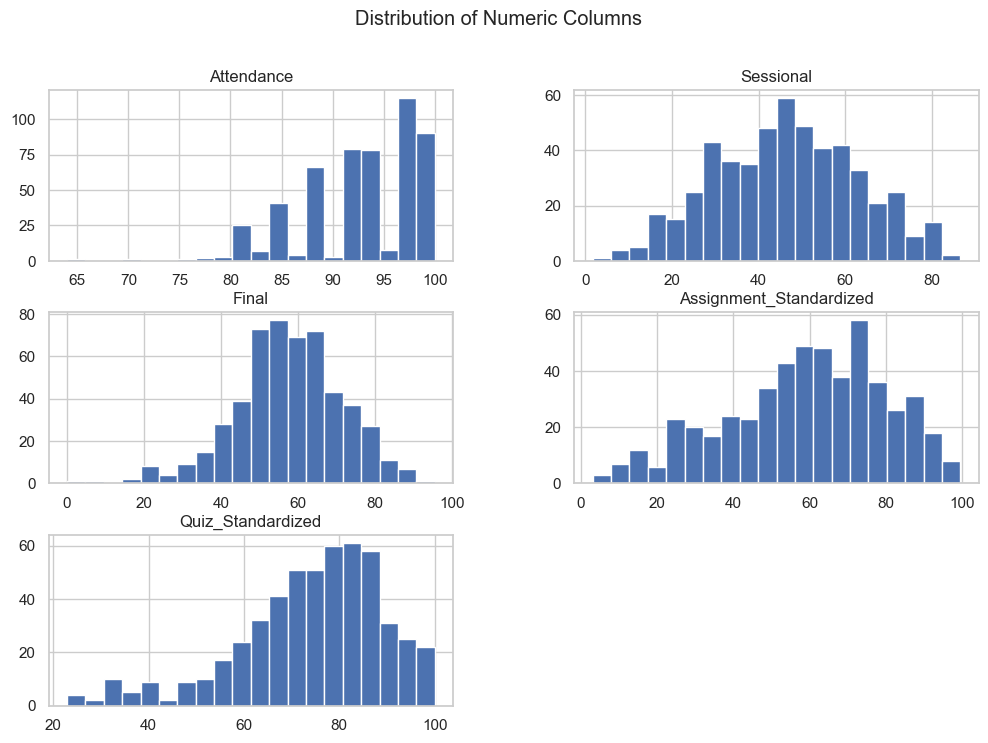

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Plot histograms for numeric columns
final_data.hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

#### From this visualization of the distribution of numeric columns, we can derive the following insights:

**Attendance**

- Most students have high attendance, clustering around 90-100%.
- A few students have significantly lower attendance, but overall, attendance is skewed towards higher values.
- There may be an attendance policy influencing this trend.
**Sessional Marks**

- The sessional scores follow a nearly normal distribution.
- Most students scored around the 40-70 range.
- Some students performed exceptionally well, but there are also students at the lower end.

**Final Marks**

- The final exam scores also follow a bell-shaped curve, indicating normal distribution.
- The peak (mode) of the distribution is around 50-70.
- Some students performed poorly, but the overall spread is fairly even.

**Assignment Scores**

- The distribution is slightly right-skewed, meaning some students performed very well.
- The majority of students scored between 40-80.
- A few students scored either very low or very high.

**Quiz Scores**

- The distribution is left-skewed, meaning many students scored higher on quizzes.
- The majority scored between 60-90, indicating good performance.
- Some students had significantly lower scores.

## Step 2: Meaningful Query-Based EDA
### Hypothesis
We hypothesize that there exists a significant relationship between the sessional performance of students, their attendance, and their final exam scores. Specifically, we expect that students who perform well in sessional assessments and maintain consistent attendance throughout the academic term are more likely to achieve higher scores in the final exams.


#### Query 1: Correlation Between Sessional Marks and Final Exam Scores
**Objective:** Check if there is a correlation between sessional marks and final exam scores.

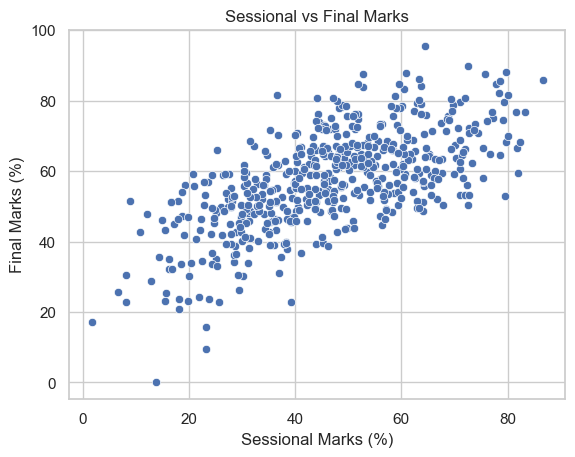

Correlation between Sessional and Final Marks: 0.6541470719517156


In [104]:
# Scatter plot: Sessional vs Final Marks
sns.scatterplot(x="Sessional", y="Final", data=final_data)
plt.title("Sessional vs Final Marks")
plt.xlabel("Sessional Marks (%)")
plt.ylabel("Final Marks (%)")
plt.savefig("visualizations/sessional_vs_final.png", dpi=300, bbox_inches="tight")
plt.show()

# Correlation coefficient
correlation = final_data["Sessional"].corr(final_data["Final"])
print("Correlation between Sessional and Final Marks:", correlation)

- Correlation of **0.654** means there is a **moderate to strong positive correlation** between **Sessional Marks** and **Final Marks**.

- **Key Insights:**
  - Students who perform well in sessionals tend to perform well in finals.
  - Since **𝑟 = 0.654**, there are still other factors influencing final exam performance.


#### Query 2: Impact of Attendance on Final Exam Performance
**Objective:** Analyze the relationship between attendance and final exam scores.

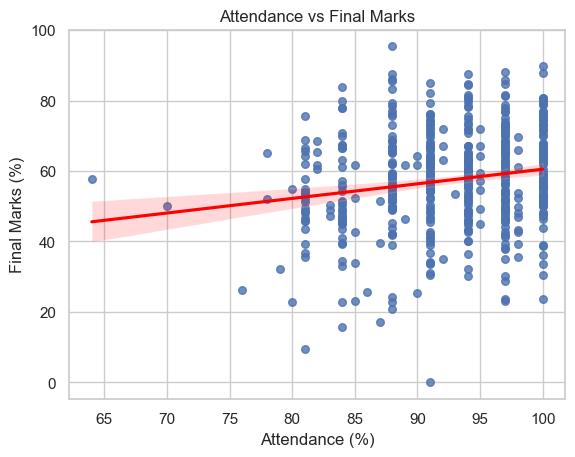

Correlation between Attendance and Final Marks: 0.178676094776132


In [110]:
# Scatter plot with regression line: Attendance vs Final Marks
sns.regplot(x="Attendance", y="Final", data=final_data, scatter_kws={'s': 30}, line_kws={'color': 'red'})

plt.title("Attendance vs Final Marks")
plt.xlabel("Attendance (%)")
plt.ylabel("Final Marks (%)")

# Save the updated plot
plt.savefig("visualizations/attendance_vs_final_with_regression.png", dpi=300, bbox_inches="tight")
plt.show()

# Correlation coefficient
correlation = final_data["Attendance"].corr(final_data["Final"])
print("Correlation between Attendance and Final Marks:", correlation)


The **correlation** coefficient of **0.1787** suggests a **weak positive correlation** between attendance and final marks.

- `Weak Relationship:` While students with higher attendance tend to score higher in finals, the relationship is not strong. Attendance alone does not significantly determine final exam performance.
- `Other Influencing Factors:` Since 𝑟 = 0.1787, other factors (such as study habits, sessional performance, or external resources) likely play a much bigger role in determining final scores.
- The scatter plot shows a lot of variation—students with similar attendance percentages can have very different final marks.
- **Key Takeaways**
  - Simply attending classes is not enough to ensure high final exam scores.

#### Query 3: Correlation Heatmap
**Objective:** Visualize the correlation between all numeric columns

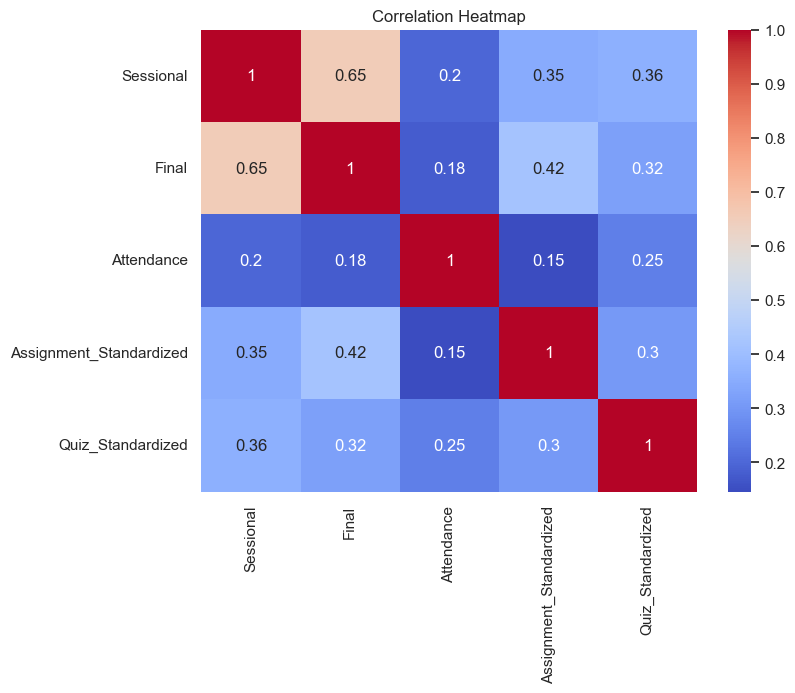

In [114]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(final_data[["Sessional", "Final", "Attendance", "Assignment_Standardized", "Quiz_Standardized"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("visualizations/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

#### Query 4: Students with High Sessional Marks but Low Final Marks
**Objective:** Identify students who performed well in sessional exams but poorly in final exams.

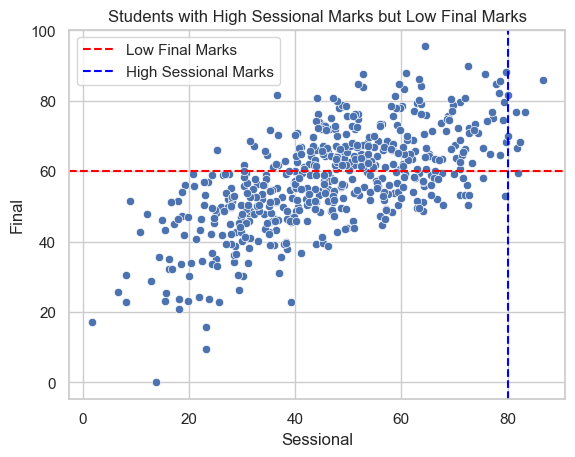

In [122]:
# Define thresholds for high sessional and low final marks
high_sessional = 80
low_final = 60

# Filter students
high_sessional_low_final = final_data[
    (final_data["Sessional"] > high_sessional) & (final_data["Final"] < low_final)
][["Roll_Num", "Sessional", "Final"]]

# Scatter plot: Highlight students with high sessional but low final marks
sns.scatterplot(x="Sessional", y="Final", data=final_data)
plt.axhline(y=low_final, color="red", linestyle="--", label="Low Final Marks")
plt.axvline(x=high_sessional, color="blue", linestyle="--", label="High Sessional Marks")
plt.title("Students with High Sessional Marks but Low Final Marks")
plt.legend()
plt.savefig("visualizations/Students with High Sessional Marks but Low Final Marks.png", dpi=300, bbox_inches="tight")
plt.show()

#### Insights from the Scatter Plot
- **General Trend**:
     - The plot shows a positive correlation between sessional and final marks, meaning students with higher sessional scores generally tend to perform better in finals.
     - However, there is considerable spread, indicating variability in student performance across assessments.
- **Key Focus: Students in the High Sessional - Low Final Region:**
  - The **blue dashed line (vertical at 80**) represents students with high sessional marks (>80).
  - The **red dashed line (horizontal at 60)** represents students with low final marks (<60).
  - Students in the top-left quadrant (above blue, left of red) scored high in sessionals but low in finals, which is the concern area.

#### Query 5: Section wise Final and Sessionals Marks Trend Analysis
**Objective:** Compare the average final marks across sections.


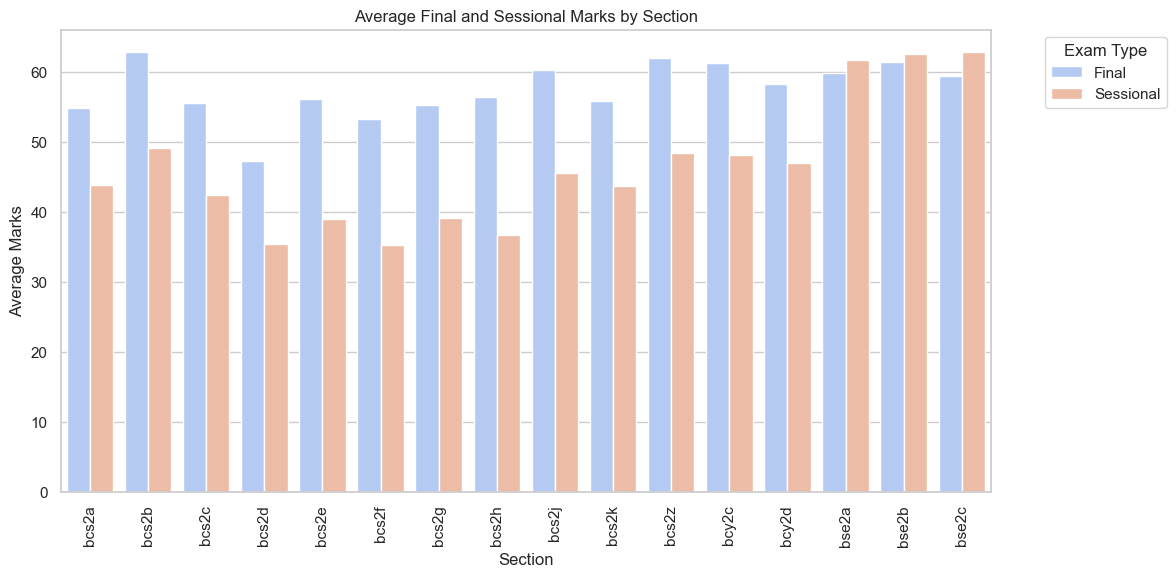

In [120]:
# Extract section from Roll_Num
final_data["Section"] = final_data["Roll_Num"].str.split("_").str[1]

# Group by Section and calculate mean Final and Sessional marks
section_performance = final_data.groupby("Section")[["Final", "Sessional"]].mean().reset_index()
section_performance_melted = section_performance.melt(id_vars="Section", 
                                                       value_vars=["Final", "Sessional"],
                                                       var_name="Exam Type", value_name="Average Marks")

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Section", y="Average Marks", hue="Exam Type", data=section_performance_melted, palette="coolwarm")
plt.title("Average Final and Sessional Marks by Section")
plt.xticks(rotation=90)
plt.legend(title="Exam Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Save the plot
plt.savefig("visualizations/section_wise_final_sessional_marks.png", dpi=300, bbox_inches="tight")
plt.show()


#### Insights:
- **Overall Trend:**
   - There is a general consistency in final and sessional marks across most sections.
   - Some sections show higher sessional marks than final marks, while others have the opposite trend.
- **Sections with Higher Final Marks:** Sections like bcs2b, bcs2g, bcs2h, bcs2z show significantly higher final marks compared to sessionals.
- **Sections with Balanced Performance:** Sections bse2b and bse2c show very close final and sessional marks, indicating consistent performance in both assessments.
- **Sections with Higher Sessional Marks than Final Marks:** Sections like bcs2d, bcs2f, and bcy2d have higher sessional marks than their final scores, which could indicate:
     - Lenient sessional grading or students struggling with final exams.
     - Less retention of knowledge from sessionals to finals.
- **Section-Wise Performance Variation:**
     - Some sections show a large gap between sessional and final marks, possibly due to teaching differences, exam difficulty, or student preparation.
     - Sections like bcs2a, bcs2c, and bcy2c have relatively lower sessional and final marks, suggesting weaker overall performance.

#### Query 6: Distribution of Attendance
**Objective:** Analyze the distribution of attendance percentages.

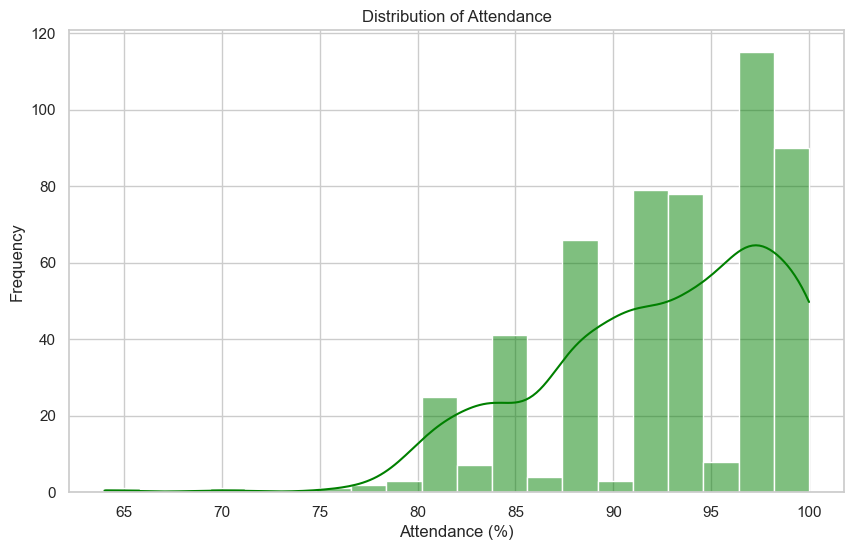

In [127]:
# Histogram: Distribution of Attendance
plt.figure(figsize=(10, 6))
sns.histplot(final_data["Attendance"], bins=20, kde=True, color="green")
plt.title("Distribution of Attendance")
plt.xlabel("Attendance (%)")
plt.ylabel("Frequency")
plt.savefig("visualizations/Distribution of Attendance.png", dpi=300, bbox_inches="tight")
plt.show()

#### Insights from the Attendance Distribution Histogram
- **Overall Distribution Pattern:**
  - The histogram shows a right-skewed (positively skewed) distribution, indicating that most students have high attendance percentages.
  - The density curve (KDE) follows the histogram shape, confirming that attendance is concentrated at the higher end (90% - 100%).
- **Key Observations:**
   - Majority of students have high attendance (90%-100%)
   - Few students have lower attendance (<80%)
   - A significant number of students have nearly perfect attendance (close to 100%), possibly indicating a compulsory attendance requirement.
   - For students with low attendance (<80%):

      - Identify reasons for low attendance (health issues, lack of engagement, external responsibilities).

#### Query 7: Average Marks by Attendance Category
**Objective:** Categorize attendance into groups and calculate average final marks for each group.

C:\Users\amina\AppData\Local\Temp\ipykernel_13684\1226505885.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_final = final_data.groupby("Attendance_Category")["Final"].mean().reset_index()
C:\Users\amina\AppData\Local\Temp\ipykernel_13684\1226505885.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Attendance_Category", y="Final", data=attendance_final, palette="viridis")


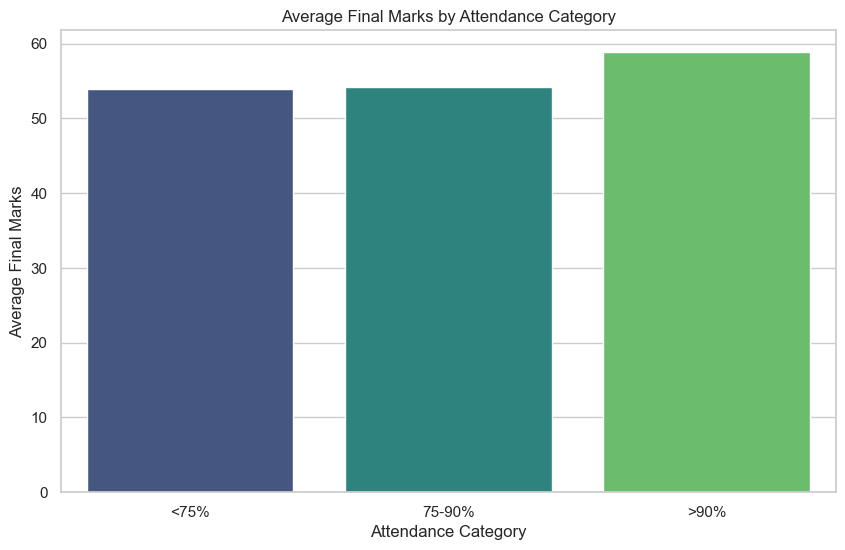

In [130]:
# Categorize attendance into bins
final_data["Attendance_Category"] = pd.cut(
    final_data["Attendance"],
    bins=[0, 75, 90, 100],
    labels=["<75%", "75-90%", ">90%"]
)

# Group by attendance category and calculate mean final marks
attendance_final = final_data.groupby("Attendance_Category")["Final"].mean().reset_index()

# Bar plot: Average Final Marks by Attendance Category
plt.figure(figsize=(10, 6))
sns.barplot(x="Attendance_Category", y="Final", data=attendance_final, palette="viridis")
plt.title("Average Final Marks by Attendance Category")
plt.xlabel("Attendance Category")
plt.ylabel("Average Final Marks")
plt.savefig("visualizations/Average Final Marks by Attendance Category.png", dpi=300, bbox_inches="tight")
plt.show()

#### Insights from the Bar Chart:
- **Clear Positive Correlation Between Attendance and Final Marks**
    - Students with higher attendance (>90%) have the highest average final marks.
    - Students with moderate attendance (75-90%) have slightly lower marks.
    - Students with low attendance (<75%) have the lowest average marks.
- **Quantitative Differences**
    - While there is a positive relationship, the difference in marks is not extreme.
    - The average final marks increase steadily as attendance increases, indicating that while attendance helps, it’s not the only factor determining performance.

#### Query 8: Students with Perfect Attendance by each Section
**Objective:** Identify students with 100% attendance.

C:\Users\amina\AppData\Local\Temp\ipykernel_13684\205340399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Section", data=perfect_attendance, palette="Set2")


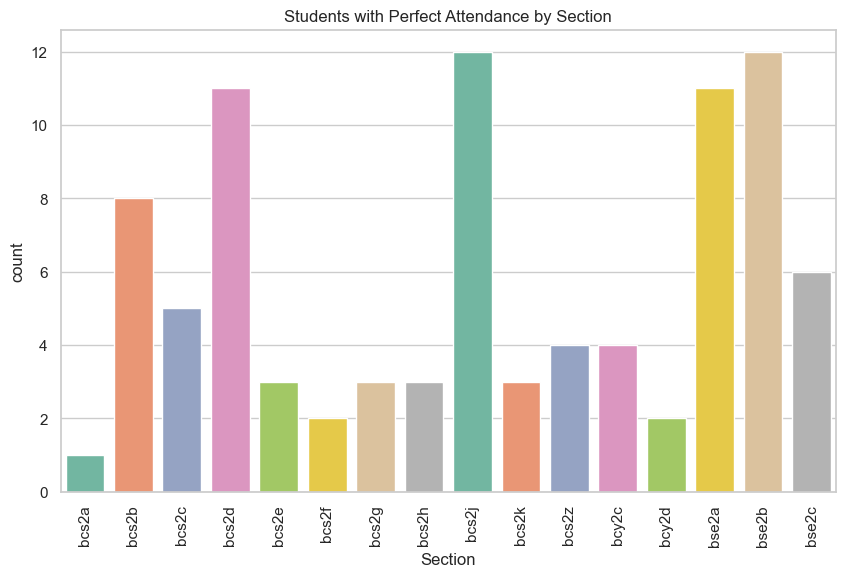

In [132]:
# Filter students with 100% attendance
perfect_attendance = final_data[final_data["Attendance"] == 100]

# Count plot: Students with Perfect Attendance by Section
plt.figure(figsize=(10, 6))
sns.countplot(x="Section", data=perfect_attendance, palette="Set2")
plt.title("Students with Perfect Attendance by Section")
plt.xticks(rotation=90)
plt.savefig("visualizations/Students with Perfect Attendance by Section.png", dpi=300, bbox_inches="tight")
plt.show()

#### Insights
- **1. Variation in Perfect Attendance Across Sections**
     - Some sections have significantly more students with perfect attendance than others.
     - Sections like bcs2j, bcs2d, bse2a, and bse2b have the highest number of students with 100% attendance.
     - Sections like bcs2a and bcy2d have very few students maintaining perfect attendance.

#### Query 9: Section-wise Attendance Distribution
**Objective:** Analyze the distribution of attendance percentages for each section.

C:\Users\amina\AppData\Local\Temp\ipykernel_13684\1411764889.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Section", y="Attendance", data=final_data, palette="Set3", ax=ax)


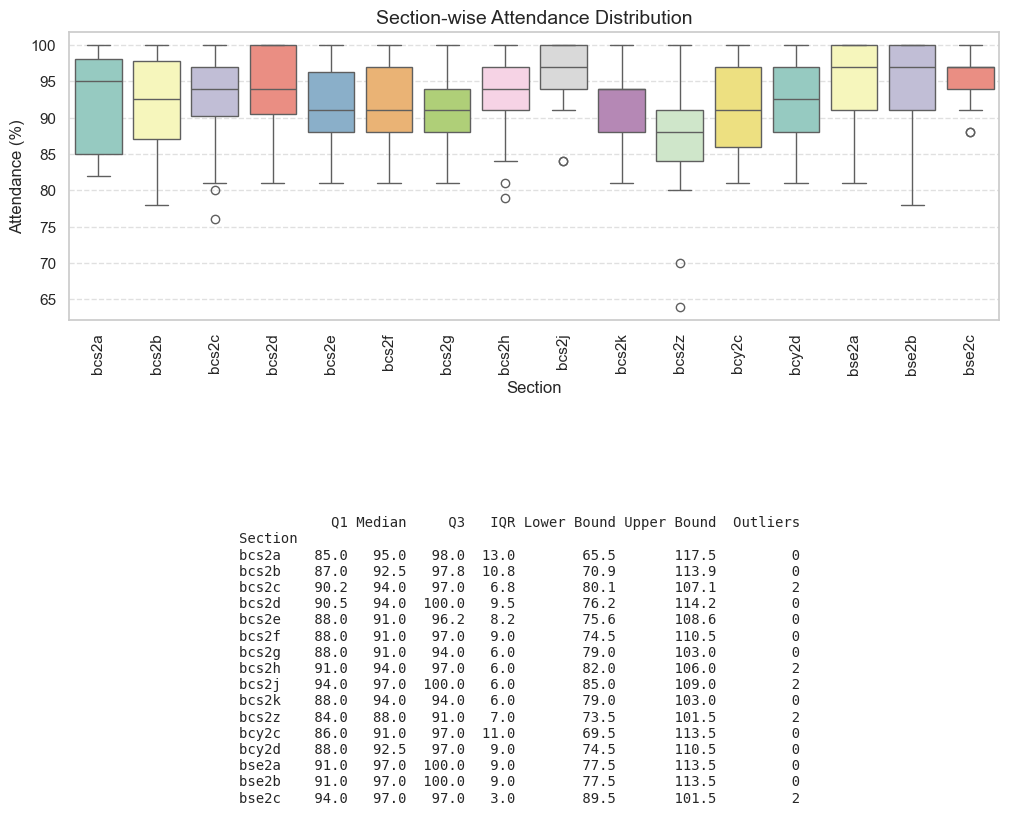

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute box plot statistics
def compute_boxplot_stats(data):
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)].tolist()
    
    return Q1, Q2, Q3, IQR, lower_bound, upper_bound, outliers

# Create the box plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x="Section", y="Attendance", data=final_data, palette="Set3", ax=ax)
plt.xticks(rotation=90)
plt.title("Section-wise Attendance Distribution", fontsize=14)
plt.ylabel("Attendance (%)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
sections = final_data["Section"].unique()
stats_summary = []
for section in sections:
    data = final_data[final_data["Section"] == section]["Attendance"]
    if len(data) > 0:
        Q1, Q2, Q3, IQR, lower_bound, upper_bound, outliers = compute_boxplot_stats(data)
        stats_summary.append([section, f"{Q1:.1f}", f"{Q2:.1f}", f"{Q3:.1f}", f"{IQR:.1f}", f"{lower_bound:.1f}", f"{upper_bound:.1f}", len(outliers)])

stats_df = pd.DataFrame(stats_summary, columns=["Section", "Q1", "Median", "Q3", "IQR", "Lower Bound", "Upper Bound", "Outliers"])
stats_df.set_index("Section", inplace=True)
plt.figtext(0.5, -0.4, stats_df.to_string(), wrap=True, horizontalalignment='center', fontsize=10, family='monospace')
plt.subplots_adjust(bottom=0.4)
plt.savefig("visualizations/Section-wise Attendance Distribution Box Plot.png", dpi=300, bbox_inches="tight")
plt.show()

#### Key Insights 
- **High Attendance Levels Overall:** Most sections have a median attendance above 90%, indicating a high attendance rate.
- **Variation Among Sections:**
    - Some sections (e.g., bcs2a, bcs2b, bcs2h) show a wider spread, meaning students in those sections have more variation in attendance.
    - Other sections (e.g., bcs2d, bse2a, bse2b) have a tight range, suggesting most students maintain consistently high attendance.
- **Presence of Outliers:** Some students have significantly lower attendance (<80%), as seen in the dots below the whiskers in certain sections.

#### Query 10: Section-wise Final Marks Distribution
**Objective:** Analyze the distribution of final marks for each section.

C:\Users\amina\AppData\Local\Temp\ipykernel_13684\2245129084.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Section", y="Final", data=final_data, palette="Set2")


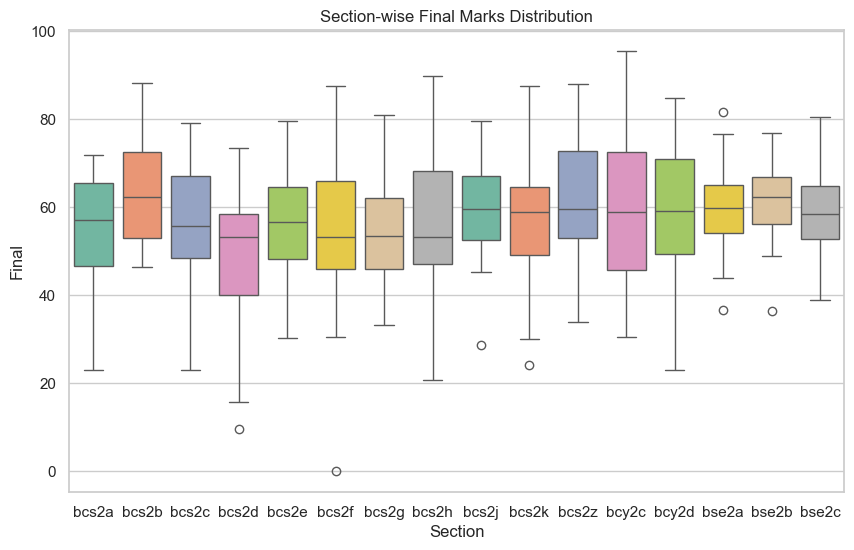

In [146]:
# Box plot: Section-wise Final Marks Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x="Section", y="Final", data=final_data, palette="Set2")
plt.title("Section-wise Final Marks Distribution")
plt.savefig("visualizations/Section-wise Final Marks Distribution.png", dpi=300, bbox_inches="tight")
plt.show()

#### Query 11: Predictive Model for Final Marks
**Objective:** Explore the possibility of building a predictive model for final marks based on sessional marks and attendance.

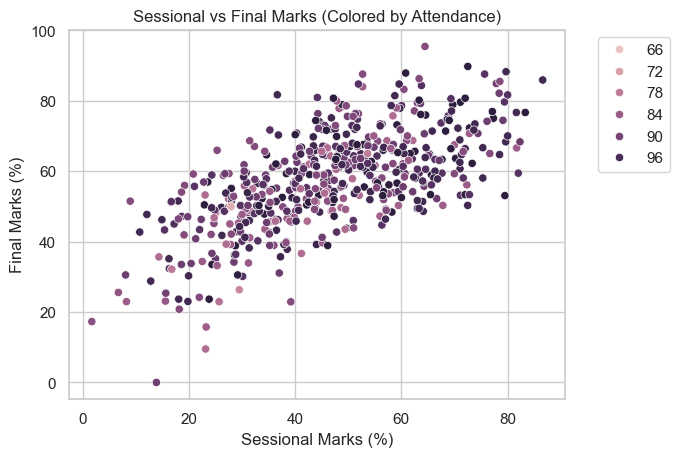

In [145]:
# Scatter plot: Sessional vs Final Marks with Attendance as Hue
sns.scatterplot(x="Sessional", y="Final", hue="Attendance", data=final_data)
plt.title("Sessional vs Final Marks (Colored by Attendance)")
plt.xlabel("Sessional Marks (%)")
plt.ylabel("Final Marks (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("visualizations/Sessional vs Final Marks (Colored by Attendance).png", dpi=300, bbox_inches="tight")
plt.show()

####  Key Insights
- **1. Positive Correlation Between Sessional and Final Marks**
     - The scatter plot shows a clear positive trend, meaning students who score higher in sessional marks generally tend to score higher in final marks.
     - However, the spread is quite wide, indicating that sessional marks alone are not the only factor affecting final marks.
- **2. Role of Attendance (Hue)**
    - The color gradient represents attendance levels, where lighter shades (low attendance) and darker shades (high attendance) are distributed across the plot.
    - Darker points (high attendance) tend to cluster around higher final marks, suggesting that students with better attendance tend to perform better in final exams.
    - However, some low-attendance students still manage to get good final marks, indicating the presence of other influencing factors.
- **3. Potential for a Predictive Model**
    - This visualization supports the idea of a predictive model using sessional marks and attendance to estimate final marks.
- **4. Outliers & Weak Students**
    - Some students have very low sessional marks but still manage a decent final score, possibly indicating improvement in preparation.
    - Some students struggle in both sessional and final marks, which might highlight lack of engagement, weak preparation, or external factors

#### Query 12: Distribution of Final Marks Based on Quiz and Assignment Performance

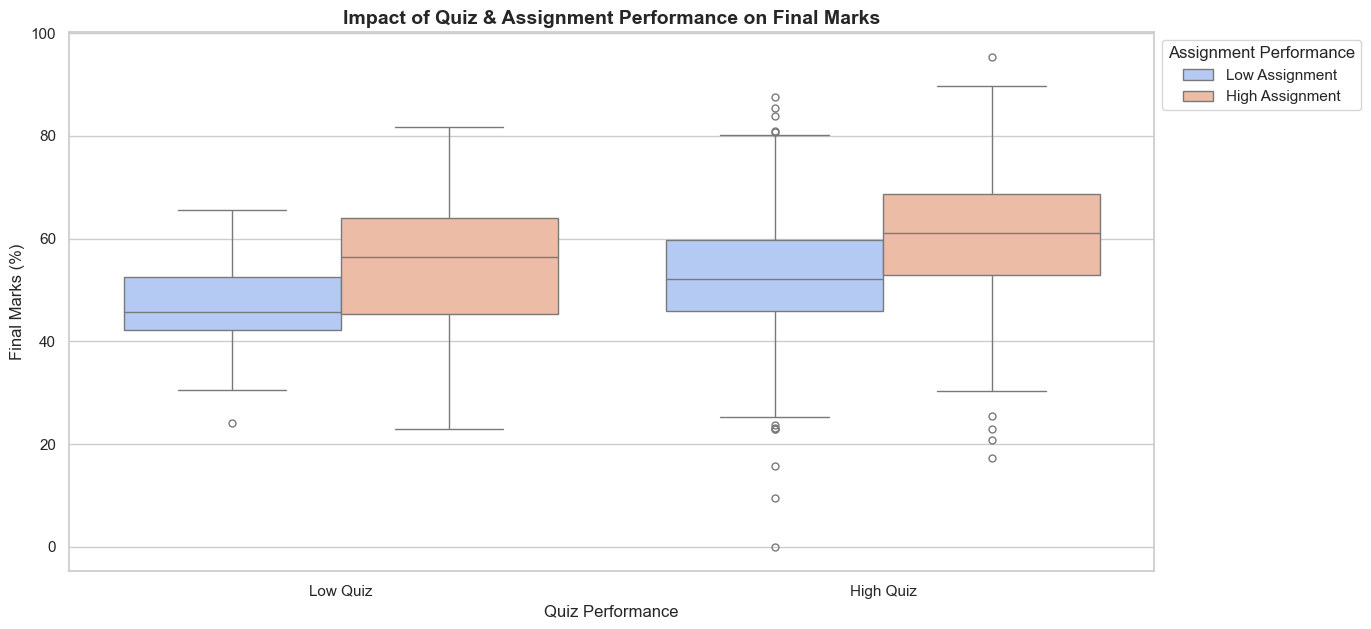

In [154]:
# Categorize quiz and assignment performance into high and low
final_data["Quiz_Category"] = pd.cut(
    final_data["Quiz_Standardized"],
    bins=[0, 50, 100],
    labels=["Low Quiz", "High Quiz"]
)
final_data["Assignment_Category"] = pd.cut(
    final_data["Assignment_Standardized"],
    bins=[0, 50, 100],
    labels=["Low Assignment", "High Assignment"]
)

# Box plot: Final Marks by Quiz and Assignment Performance
plt.figure(figsize=(14, 7))  # Wider figure
plt.tight_layout()  # Adjust layout

ax = sns.boxplot(x="Quiz_Category", y="Final", hue="Assignment_Category", 
                 data=final_data, palette="coolwarm", flierprops={'markersize': 5})
for i, box in enumerate(ax.artists):
    median = final_data.groupby(["Quiz_Category", "Assignment_Category"])["Final"].median().values[i]
    ax.annotate(f"{median:.1f}%", (i, median), xytext=(0, 8),
                textcoords='offset points', ha='center', fontsize=10, color="black")
plt.xlabel("Quiz Performance", fontsize=12)
plt.ylabel("Final Marks (%)", fontsize=12)
plt.title("Impact of Quiz & Assignment Performance on Final Marks", fontsize=14, fontweight="bold")
plt.legend(title="Assignment Performance", loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("visualizations/Final Marks by Quiz and Assignment Performance.png", dpi=300, bbox_inches="tight")
plt.show()

#### Insights
- **Higher Quiz and Assignment Performance Lead to Higher Final Marks**
    - Students with **both high quiz and high assignment scores** (rightmost orange box) achieve the highest median final marks, confirming that good performance in both assessments significantly boosts final marks.
- **Assignments Have a Strong Impact on Final Marks**
    - In both **Low Quiz** and **High Quiz** categories, students who performed well in assignments (orange boxes) tend to score higher final marks compared to those with low assignment performance (blue boxes).
    - This suggests that assignments play a crucial role in improving final marks, regardless of quiz performance.
- **Low Quiz & Low Assignment = Struggle in Final Marks**
    - Students with low quiz and low assignment performance (leftmost blue box) show the lowest final marks.
    - The spread of scores is also smaller, indicating that most students in this category do not exceed a certain level.
- **Outliers Indicate Some Exceptionally Poor Performance**
    - The presence of **outliers below 20% final marks** suggests that some students struggled significantly, possibly due to external factors like lack of preparation, attendance issues, or difficulty in final exams.

#### Query 13: Predictive Power of Sessional and Attendance on Final Marks

C:\Users\amina\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<Figure size 1200x700 with 0 Axes>

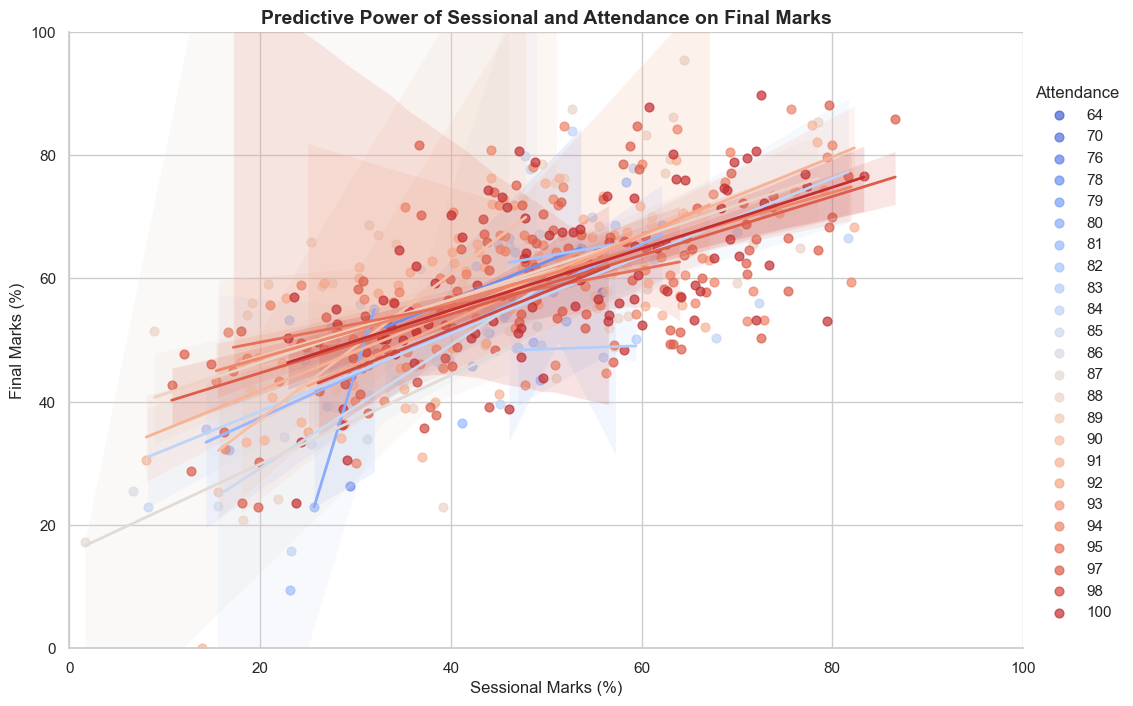

In [157]:
# Regression plot: Sessional vs Final Marks (with Attendance as Hue)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.lmplot(
    x="Sessional", y="Final", hue="Attendance", data=final_data,
    height=7, aspect=1.5, palette="coolwarm",
    scatter_kws={'alpha': 0.7, 's': 40},  # Adjust point visibility
    line_kws={'linewidth': 2},  # Make regression lines clearer
    legend_out=True
)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("Sessional Marks (%)", fontsize=12)
plt.ylabel("Final Marks (%)", fontsize=12)
plt.title("Predictive Power of Sessional and Attendance on Final Marks", fontsize=14, fontweight="bold")
plt.savefig("visualizations/Sessional_vs_Final_Marks.png", dpi=300, bbox_inches="tight")
plt.show()



####  Key Insights
- **Positive Correlation:**

  - The regression lines indicate that higher sessional marks tend to predict higher final marks.
This suggests a strong predictive relationship between sessional performance and final marks.
- **Impact of Attendance:**

   - The color gradient (Attendance Hue) shows that students with higher attendance generally perform better in final exams.
Students with lower attendance (<80%) tend to have more scattered and lower final marks.
- **Outliers & Variability:**

    - Some students with low sessional marks managed high final marks—indicating possible last-minute effort or external factors.
    - Conversely, some with high sessional marks ended up with lower-than-expected finals, possibly due to exam difficul

#### Query 14: Students with Consistent Performance Across All Components

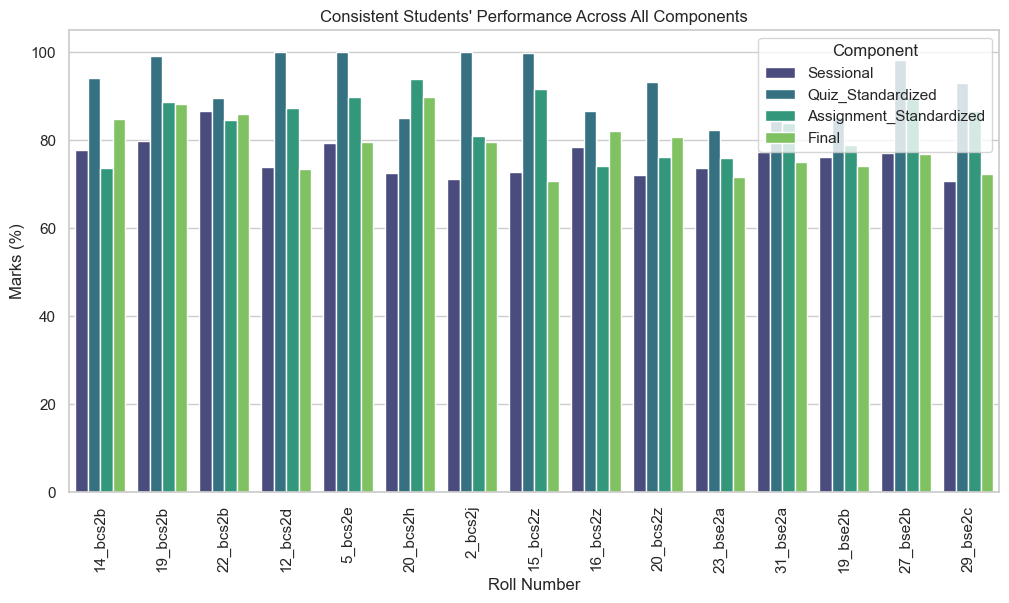

In [160]:
# Define thresholds for consistent performance
threshold = 70

# Filter students with consistent performance
consistent_students = final_data[
    (final_data["Sessional"] > threshold) &
    (final_data["Quiz_Standardized"] > threshold) &
    (final_data["Assignment_Standardized"] > threshold) &
    (final_data["Final"] > threshold)
][["Roll_Num", "Sessional", "Quiz_Standardized", "Assignment_Standardized", "Final"]]

# Bar plot: Consistent Students' Performance
consistent_students_melted = consistent_students.melt(id_vars="Roll_Num", var_name="Component", value_name="Marks")
plt.figure(figsize=(12, 6))
sns.barplot(x="Roll_Num", y="Marks", hue="Component", data=consistent_students_melted, palette="viridis")
plt.title("Consistent Students' Performance Across All Components")
plt.xlabel("Roll Number")
plt.ylabel("Marks (%)")
plt.xticks(rotation=90)
plt.savefig("visualizations/Consistent Students' Performance Across All Components.png", dpi=300, bbox_inches="tight")
plt.show()

### Insights from the Visualization: Consistent Students' Performance

This bar chart represents the performance of students who have consistently scored above **70%** across all evaluation components:  
- **Sessional Marks**  
- **Standardized Quiz Marks**  
- **Standardized Assignment Marks**  
- **Final Marks**  
--- 

#### Key Observations:
1. **Balanced Performance Across Components:**  
   - Most students perform **consistently across all four categories**, indicating well-rounded academic performance.  
   - The bars for each student are similar in height, showing minimal deviation.

2. **Quiz Performance Stands Out:**  
   - In many cases, **Quiz_Standardized scores are the highest**, suggesting students perform better in **frequent assessments** compared to assignments or finals.  

3. **Final Marks Are Generally Stable:**  
   - The **Final Marks** component shows fewer fluctuations than assignments or quizzes.  
   - This implies that students who perform well throughout the semester **maintain** their performance in final assessments.

4. **Variations in Assignments & Sessional Marks:**  
   - Some students show **minor drops in Assignment_Standardized scores**, which may indicate challenges in coursework-based evaluation.  
   - Similarly, sessional marks exhibit some dips, reflecting varying engagement in classwork.

5. **Possible Outliers:**  
   - Some students have one component slightly lower than the rest, suggesting a **specific strength or weakness in different evaluation formats**.



#### Query 15: Impact of Quiz and Assignment on Final Marks

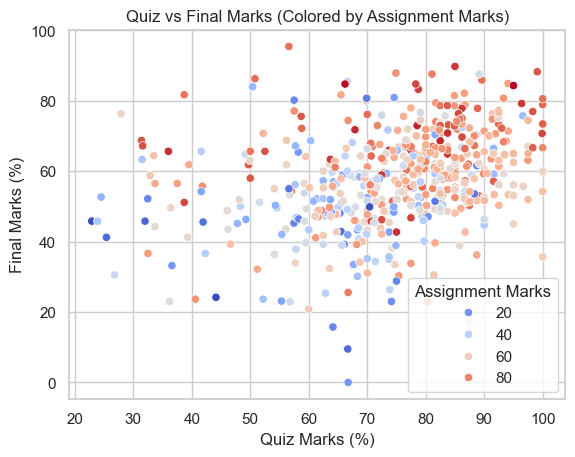

In [167]:
# Scatter plot: Quiz vs Final Marks (Colored by Assignment Marks)
sns.scatterplot(x="Quiz_Standardized", y="Final", hue="Assignment_Standardized", data=final_data, palette="coolwarm")
plt.title("Quiz vs Final Marks (Colored by Assignment Marks)")
plt.xlabel("Quiz Marks (%)")
plt.ylabel("Final Marks (%)")
plt.legend(title="Assignment Marks")
plt.savefig("visualizations/Quiz vs Final Marks (Colored by Assignment Marks).png", dpi=300, bbox_inches="tight")
plt.show()

#### Insights from Quiz vs Final Marks (Colored by Assignment Marks)

This scatter plot visualizes the relationship between **Quiz Marks (%)** and **Final Marks (%)**, with colors representing **Assignment Marks (%)**.

---- 
#### Key Observations:
1. **Positive Correlation Between Quiz and Final Marks:**  
   - A general upward trend suggests that students who perform well in quizzes tend to score higher in final exams.  
   - However, the correlation is **not perfectly linear**, indicating other influencing factors.

2. **Influence of Assignment Marks:**  
   - **Red-colored points** (higher assignment marks) are **clustered in the upper-right**, meaning students who excel in assignments often achieve higher final marks.  
   - **Blue-colored points** (lower assignment marks) appear more scattered, particularly in the lower-left region, indicating weaker performance across components.

3. **Variability in Final Marks at Mid-Range Quiz Scores (50-70%):**  
   - Some students with **moderate quiz scores** (50-70%) still achieve **high final marks**, suggesting other factors (such as assignments, attendance, or sessionals) contribute to overall performance.

4. **Students with Low Assignment Marks (<40%) Struggle in Finals:**  
   - Blue-colored points dominate the lower section, confirming that students with weak assignment performance are more likely to struggle in final exams.



#### Query 16: Predictive Model for Final Marks

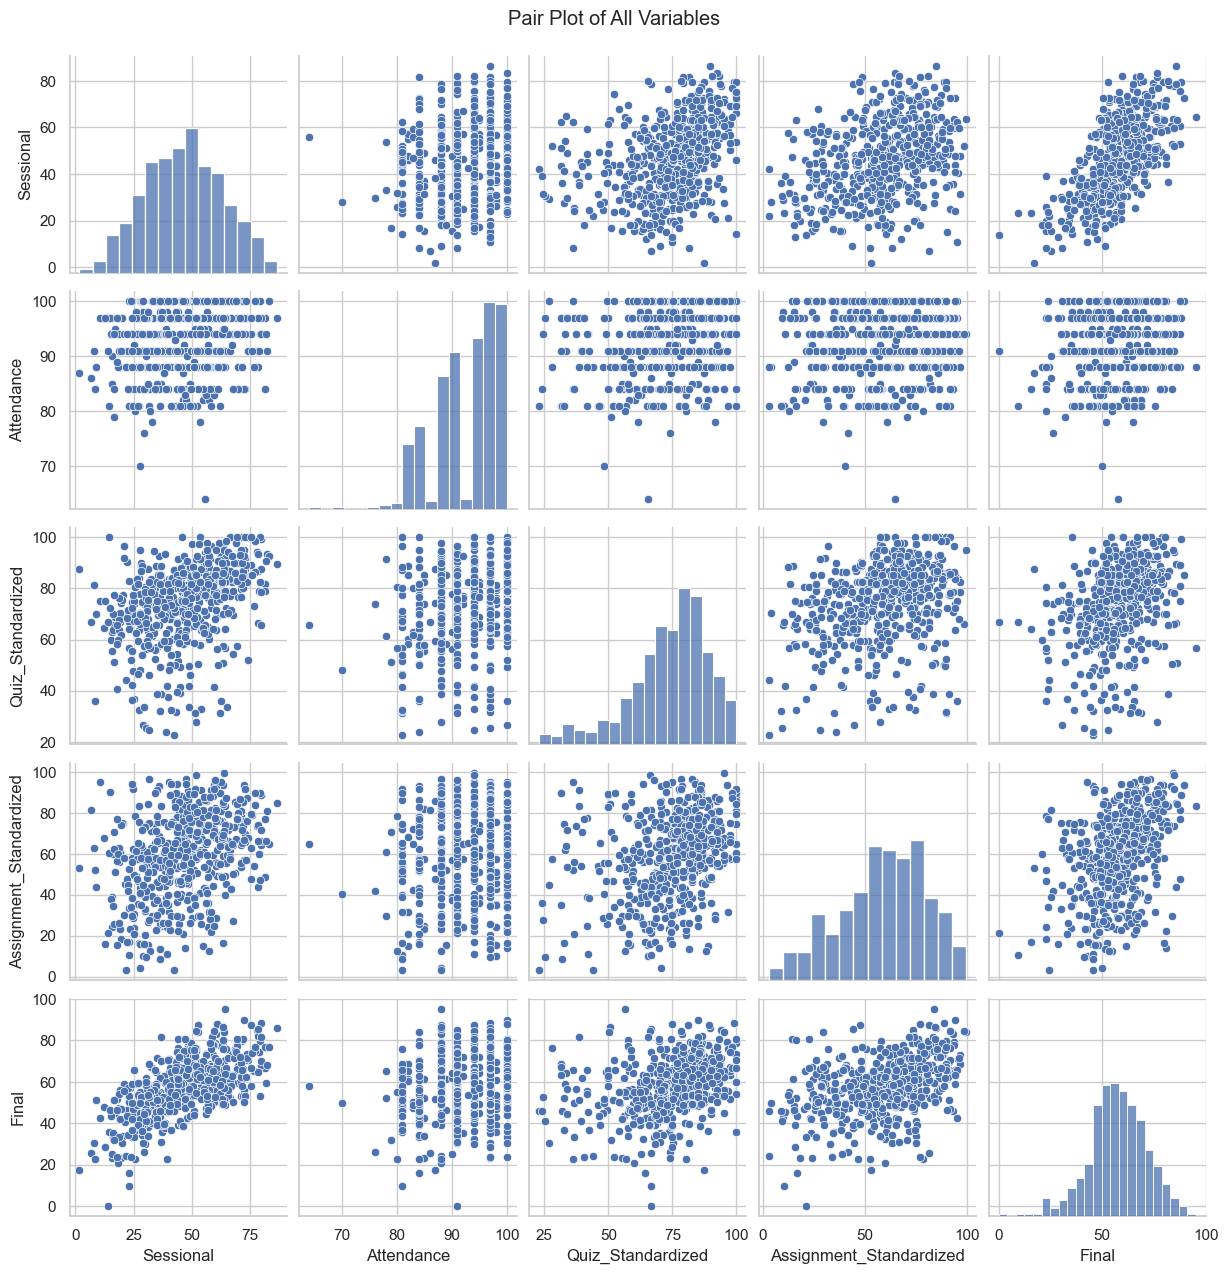

In [168]:
# Pair plot: Relationships between all variables
sns.pairplot(final_data[["Sessional", "Attendance", "Quiz_Standardized", "Assignment_Standardized", "Final"]])
plt.suptitle("Pair Plot of All Variables", y=1.02)
plt.savefig("visualizations/Pair Plot of All Variables.png", dpi=300, bbox_inches="tight")
plt.show()

#### Insights from Pair Plot: Predictive Model for Final Marks  

This pair plot visualizes the relationships between **Sessional Marks, Attendance, Quiz Marks, Assignment Marks, and Final Marks**.

---

#### Key Observations:

1. **Strong Correlation Between Sessional and Final Marks**  
   - A **clear upward trend** indicates that students who perform well in sessional assessments also tend to score high in final exams.
   - This suggests **sessional marks are a strong predictor** of final performance.

2. **Quiz and Final Marks Show a Positive Relationship**  
   - The scatter plot shows **a visible positive correlation**, meaning students with **higher quiz scores tend to achieve higher final marks**.
   - However, some variability suggests that **quizzes alone are not the sole determining factor**.

3. **Assignment Marks Have a Moderate Correlation with Final Marks**  
   - While higher assignment marks generally indicate higher final scores, the relationship is **not as strong as sessional or quiz marks**.
   - This suggests that **assignments contribute to performance but are not the primary driver**.

4. **Attendance Shows a Weak or Non-Linear Relationship**  
   - The scatter plots involving attendance appear **dispersed and non-trending**, indicating **attendance alone does not strongly predict** final marks.
   - Most students have **high attendance (above 70%)**, so the dataset lacks variability to show its full impact.

5. **Distributions Reveal Normality Trends**  
   - The histograms along the diagonal show that **most variables follow a near-normal distribution**.
   - **Final marks** have a slight right skew, suggesting some students **score lower than average** more frequently than scoring extremely high.
